# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data

## Get the data

The images we're working with are from food101 data set : https://www.kaggle.com/dansbecker/food-101

However, we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook : https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

**Note 🔑 :** We start with a smaller dataset so we can experiment quickly and figure what's working before scaling up

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-18 15:40:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   160MB/s    in 0.7s    

2021-10-18 15:40:14 (160 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data
* A very crucial step at the beginning of any machine learning project 
is becoming one with the data


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 1 images in pizza_steak.
There are 2 directories and 1 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 1 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
import pathlib 
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of classnames from the subdirectories
class_names = class_names[1:] # remove .DS_store
print(class_names)

['pizza' 'steak']


In [8]:
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 289, 3)


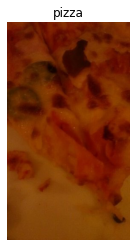

In [10]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 289, 3), dtype=uint8, numpy=
array([[[122,  39,   0],
        [124,  40,   3],
        [127,  43,   6],
        ...,
        [114,  38,   6],
        [113,  38,   6],
        [112,  36,   2]],

       [[122,  39,   0],
        [124,  40,   3],
        [125,  41,   4],
        ...,
        [109,  33,   1],
        [109,  33,   1],
        [109,  33,   0]],

       [[123,  40,   0],
        [123,  39,   2],
        [124,  39,   2],
        ...,
        [106,  29,   0],
        [106,  29,   0],
        [107,  30,   0]],

       ...,

       [[ 80,  30,   0],
        [ 87,  37,   4],
        [ 95,  42,   8],
        ...,
        [131,  70,   7],
        [132,  71,   8],
        [131,  70,   7]],

       [[ 83,  32,   1],
        [ 87,  37,   4],
        [ 92,  39,   5],
        ...,
        [131,  70,   7],
        [132,  71,   8],
        [126,  65,   2]],

       [[ 85,  34,   3],
        [ 88,  37,   6],
        [ 90,  37,   3],
        ...,
        [131,  70,   

In [12]:
img.shape

(512, 289, 3)

In [13]:
# Get all the pixel values b/w o and 1
img/255.

array([[[0.47843137, 0.15294118, 0.        ],
        [0.48627451, 0.15686275, 0.01176471],
        [0.49803922, 0.16862745, 0.02352941],
        ...,
        [0.44705882, 0.14901961, 0.02352941],
        [0.44313725, 0.14901961, 0.02352941],
        [0.43921569, 0.14117647, 0.00784314]],

       [[0.47843137, 0.15294118, 0.        ],
        [0.48627451, 0.15686275, 0.01176471],
        [0.49019608, 0.16078431, 0.01568627],
        ...,
        [0.42745098, 0.12941176, 0.00392157],
        [0.42745098, 0.12941176, 0.00392157],
        [0.42745098, 0.12941176, 0.        ]],

       [[0.48235294, 0.15686275, 0.        ],
        [0.48235294, 0.15294118, 0.00784314],
        [0.48627451, 0.15294118, 0.00784314],
        ...,
        [0.41568627, 0.11372549, 0.        ],
        [0.41568627, 0.11372549, 0.        ],
        [0.41960784, 0.11764706, 0.        ]],

       ...,

       [[0.31372549, 0.11764706, 0.        ],
        [0.34117647, 0.14509804, 0.01568627],
        [0.37254902, 0

## An end-to-end example 
Let's build a CNN to find patterns in the images

* Load images
* Preprocess images
* Build a CNN to find patterns
* Complie CNN
* Fit the CNN to the training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our directories

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model 
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile the CNN model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 264ms/step - loss: 0.6126 - accuracy: 0.6353 - val_loss: 0.4271 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4460 - accuracy: 0.8100 - val_loss: 0.3652 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4008 - accuracy: 0.8273 - val_loss: 0.3837 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4002 - accuracy: 0.8307 - val_loss: 0.3433 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3562 - accuracy: 0.8460 - val_loss: 0.3470 - val_accuracy: 0.8620


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Let's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.48453&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 0.7162 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### Try to improve model_2

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 213ms/step - loss: 3.5565 - accuracy: 0.5847 - val_loss: 1.1584 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 1.0755 - accuracy: 0.6820 - val_loss: 0.5487 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6134 - accuracy: 0.7507 - val_loss: 0.4827 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.5143 - accuracy: 0.7660 - val_loss: 0.4950 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4733 - accuracy: 0.7893 - val_loss: 0.7131 - val_accuracy: 0.6460


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# Binary Classification : Let's break it down
1. **Become one with the data** (visualize the data)
2. **Preprocess the data** (the main step here is scaling/normalizing)
3. **Create a model** (start with a baseline model)
4. **Fit the model**
5. **Evaluate the model**
6. **Adjust the different parameters and improve the model** (try to beat the baseline model)
7. **Repeat until the results are satisfactory**

## 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


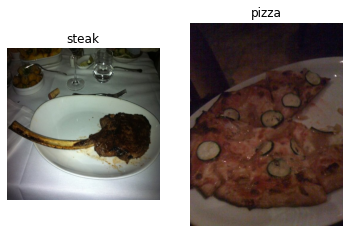

In [21]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data

In [22]:
# Define directory dataset hubs
train_dir  ="pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons,
1. 10,000 (or more) images might not fit into the memory of the processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images in train_data
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there?
len(train_data)

47

In [27]:
1500/32

46.875

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN Model (start with a baseline)

> **🔑 Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [30]:
# Make the creating of our model a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation 
from tensorflow.keras import Sequential

In [31]:
# Create the model (the baseline 3 layer convolutional neural network)
model_4 = Sequential([
                    Conv2D(filters=10, # number of sliding windows going across an input (higher = more complex model)
                           kernel_size=(3,3), # the size of the sliding window going across an input
                           strides=(1,1), # the size of the step the sliding window takes across an input
                           padding="valid", # If "same", output shape is same as input shape. If "valid", output shape get's compressed
                           activation="relu",
                           input_shape=(224,224,3)), # input layer (specify input shape)
                    Conv2D(10, 3, activation="relu"),
                    Conv2D(10, 3, activation="relu"),
                    Flatten(),
                    Dense(1, activation="sigmoid") # output layer (working with binary classification, so only 1 output neuron)
])

In [32]:
# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [33]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data, # This is the combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 253ms/step - loss: 1.2094 - accuracy: 0.6247 - val_loss: 0.4998 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 12s 247ms/step - loss: 0.4460 - accuracy: 0.8153 - val_loss: 0.4066 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3346 - accuracy: 0.8600 - val_loss: 0.3598 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.1838 - accuracy: 0.9453 - val_loss: 0.3743 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.0630 - accuracy: 0.9873 - val_loss: 0.4985 - val_accuracy: 0.8200


In [35]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 159ms/step - loss: 0.3470 - accuracy: 0.8620


[0.3470214605331421, 0.8619999885559082]

## 5. Evaluating our model
It looks like our model is learning something, let's evaluate it.

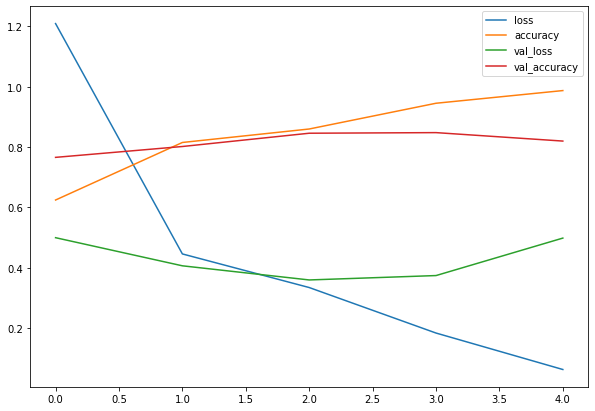

In [36]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [37]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot the loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> **🔑 Note:** When a model's **`validation loss`** starts to **`increase`**, it's likely that the model is **`over-fitting`** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

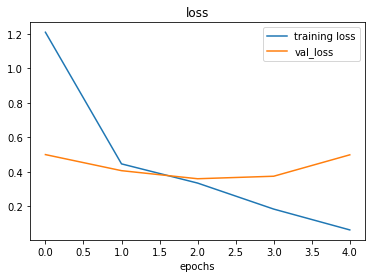

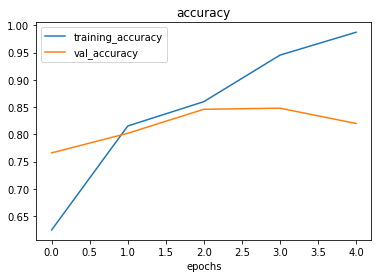

In [38]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting the model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

In [39]:
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [40]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6547 - accuracy: 0.6260 - val_loss: 0.4850 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4782 - accuracy: 0.7913 - val_loss: 0.4157 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4281 - accuracy: 0.8213 - val_loss: 0.3812 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3918 - accuracy: 0.8307 - val_loss: 0.3238 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3719 - accuracy: 0.8407 - val_loss: 0.3362 - val_accuracy: 0.8720


In [42]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

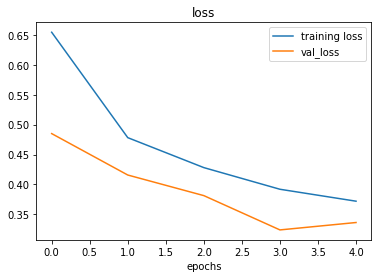

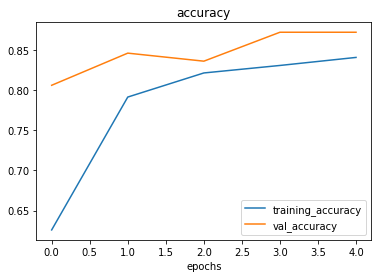

In [43]:
# Plot loss curves
plot_loss_curves(history_5)

### Finding Data Augmentation

In [44]:
# Create ImageDataGenerator training instance with Data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.2, # how much do you want to rotate an image
                                                shear_range=0.2, # how much do you want to shear an image
                                                zoom_range=0.2, # zoom in randomly on an image
                                                width_shift_range=0.2, # move your image around on x-axis
                                                height_shift_range=0.2, # move your image around on the y-axis
                                                horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [45]:
# Import data and augment it from training data
print("Augmented Training Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only
                                                                  
# Create non-augmented train data batches
print("Non-Agumented Training Data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-Agumented Testing Data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)                                               

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Agumented Training Data:
Found 1500 images belonging to 2 classes.
Non-Agumented Testing Data:
Found 500 images belonging to 2 classes.


> **`🔑 Note:`** Data Augmentation is usually only performed on the training data. Using ***ImageDataGenerator*** built-in data augmentation parameters our images left as they are in the directories but modified as they're loaded into the model.

Let's visualize some augmented data

In [46]:
# Get some sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number : 29


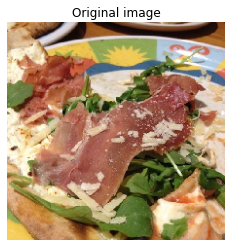

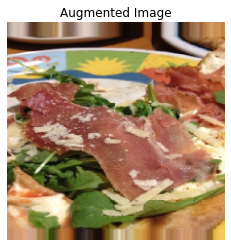

In [47]:
# Show the original and augmented images
import random
random_number  = random.randint(0, 32)
print(f"Showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False);

Build a model and see how it performs on augmented data

In [48]:
model_6 = Sequential([
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.7080 - accuracy: 0.4587 - val_loss: 0.6840 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6903 - accuracy: 0.5593 - val_loss: 0.6688 - val_accuracy: 0.5400
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.7345 - accuracy: 0.5127 - val_loss: 0.6771 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.6835 - accuracy: 0.6127 - val_loss: 0.6539 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6714 - accuracy: 0.5933 - val_loss: 0.6052 - val_accuracy: 0.7660


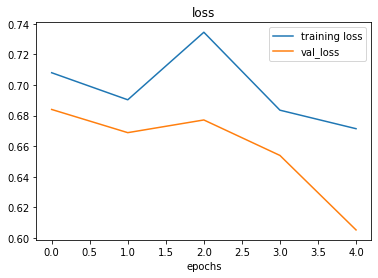

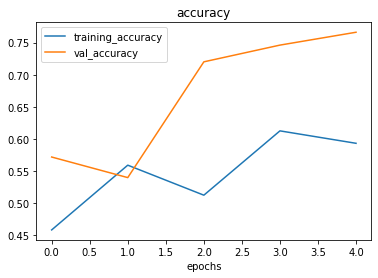

In [49]:
# Check the models training curves
plot_loss_curves(history_6)

Let's shuffle the augmented training data and train another model same as before to expect better results

In [50]:
# Import data, augment it and shuffle from training data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode="binary",
                                                                         batch_size=32,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [51]:
model_7 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 536ms/step - loss: 0.6476 - accuracy: 0.6067 - val_loss: 0.6528 - val_accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5982 - accuracy: 0.6660 - val_loss: 0.4803 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5162 - accuracy: 0.7547 - val_loss: 0.3971 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 25s 529ms/step - loss: 0.4743 - accuracy: 0.7760 - val_loss: 0.3458 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4599 - accuracy: 0.7967 - val_loss: 0.3342 - val_accuracy: 0.8500


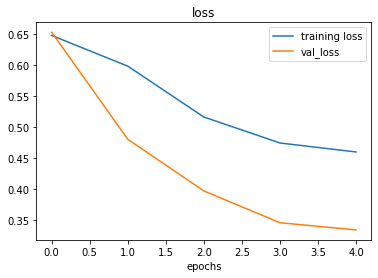

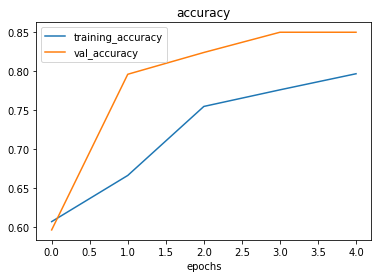

In [52]:
plot_loss_curves(history_7)

## Repeat until satisfied

* Increase the number of model layers
* Increase the number of filters in each convolutional layers, from 10 to 32 or 64
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data 
* Use **Transfer Learning** to leverage what another image model has learnt and adjust it for our own use case




**⛏️ Practice:** Recreate the model in the CNN explainer website (same as `model_1`) and see how it performs on shuffled training data.

### Making a prediction with our trained model on our own custom data

In [53]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-10-18 15:50:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-10-18 15:50:39 (26.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



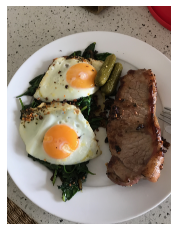

In [54]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [55]:
# Check the shape 
steak.shape

(4032, 3024, 3)

In [56]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [57]:
# Create a function to import and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image 
  img = img/255.
  return img

In [58]:
# Load in and preprocess a custom image
steak = load_and_prep_image(filename="03-steak.jpeg",
                            img_shape=224)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [59]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.86770153]], dtype=float32)

Looks like our custom image is being put through our model,
however, it currently outputs a prediction probability,
wouldn't it be nice if we could visualize the image as well as the model's prediction 

In [60]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [61]:
# We can index the predicted class by rounding the prediction probability and indexing
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [62]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

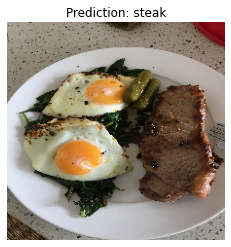

In [63]:
pred_and_plot(model_7, "03-steak.jpeg")

--2021-10-18 15:50:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-10-18 15:50:42 (42.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



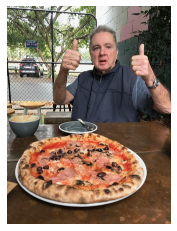

In [64]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(pizza)
plt.axis(False);

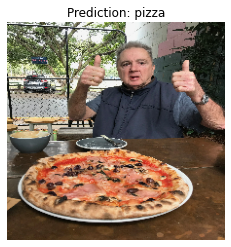

In [65]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

#Multi-Class Image Classification

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

## 1. Import and become one with the data

In [66]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-18 15:50:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   164MB/s    in 3.0s    

2021-10-18 15:50:47 (164 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [67]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [68]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Oct 18 15:50 .
drwxr-xr-x  1 root root 4096 Oct 18 15:50 ..
drwxr-xr-x 12 root root 4096 Oct 18 15:50 test
drwxr-xr-x 12 root root 4096 Oct 18 15:50 train


In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [70]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


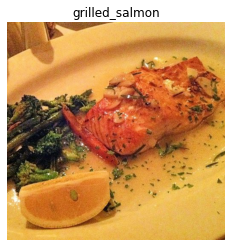

In [76]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2. Preprocess the data

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a CNN model (start with a baseline)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation

model_8 = Sequential([
                      Conv2D(10, 3, input_shape=(224,224,3)),
                      Activation(activation="relu"),
                      Conv2D(10, 3),
                      Activation(activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3),
                      Activation(activation="relu"),
                      Conv2D(10, 3),
                      Activation(activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10),
                      Activation(activation="softmax")
])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 247ms/step - loss: 2.2227 - accuracy: 0.1788 - val_loss: 2.0716 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 56s 238ms/step - loss: 1.9556 - accuracy: 0.3244 - val_loss: 1.9625 - val_accuracy: 0.3088
Epoch 3/5
235/235 [==============================] - 56s 240ms/step - loss: 1.7082 - accuracy: 0.4247 - val_loss: 1.8753 - val_accuracy: 0.3544
Epoch 4/5
235/235 [==============================] - 56s 238ms/step - loss: 1.2770 - accuracy: 0.5795 - val_loss: 2.0894 - val_accuracy: 0.3312
Epoch 5/5
235/235 [==============================] - 55s 235ms/step - loss: 0.7168 - accuracy: 0.7687 - val_loss: 2.4693 - val_accuracy: 0.3140


## 5. Evaluate the model

In [85]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 2.4693 - accuracy: 0.3140


[2.4693193435668945, 0.3140000104904175]

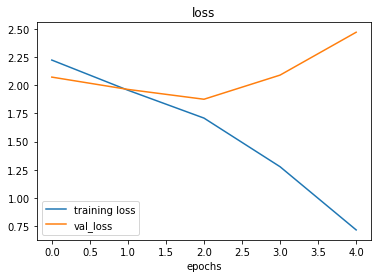

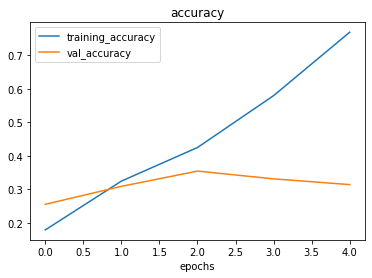

In [84]:
plot_loss_curves(history_8)

## 6. Adjust the model hyperparameters to beat the baseline / reduce overfitting

In [86]:
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_10 (Activation)   (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
activation_11 (Activation)   (None, 220, 220, 10)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
activation_12 (Activation)   (None, 108, 108, 10)     

In [89]:
# Simplify the model
model_9 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")
])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 219ms/step - loss: 2.1049 - accuracy: 0.2437 - val_loss: 1.9826 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 51s 218ms/step - loss: 1.7533 - accuracy: 0.4085 - val_loss: 1.8784 - val_accuracy: 0.3516
Epoch 3/5
235/235 [==============================] - 51s 215ms/step - loss: 1.3658 - accuracy: 0.5584 - val_loss: 1.9071 - val_accuracy: 0.3456
Epoch 4/5
235/235 [==============================] - 51s 217ms/step - loss: 0.8647 - accuracy: 0.7301 - val_loss: 2.2540 - val_accuracy: 0.3240
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 0.4590 - accuracy: 0.8685 - val_loss: 2.6874 - val_accuracy: 0.3240


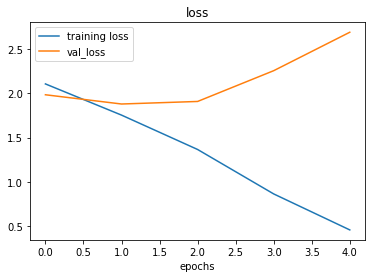

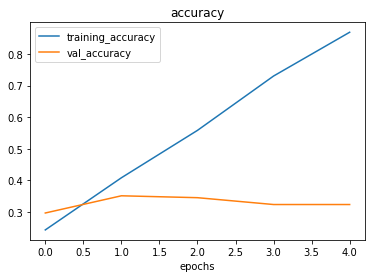

In [90]:
plot_loss_curves(history_9)

In [91]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

### Data Augmentation

In [92]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [93]:
# Create another model and fit with augmented train data

model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 562ms/step - loss: 2.2080 - accuracy: 0.1820 - val_loss: 2.0212 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 132s 560ms/step - loss: 2.0347 - accuracy: 0.2835 - val_loss: 1.8937 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 132s 563ms/step - loss: 1.9864 - accuracy: 0.3115 - val_loss: 1.8782 - val_accuracy: 0.3740
Epoch 4/5
235/235 [==============================] - 133s 567ms/step - loss: 1.9360 - accuracy: 0.3300 - val_loss: 1.8245 - val_accuracy: 0.3704
Epoch 5/5
235/235 [==============================] - 133s 564ms/step - loss: 1.9159 - accuracy: 0.3409 - val_loss: 1.8003 - val_accuracy: 0.3792


In [94]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8003 - accuracy: 0.3792


[1.8002991676330566, 0.3792000114917755]

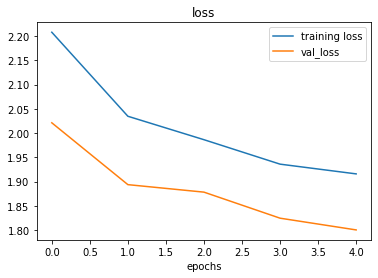

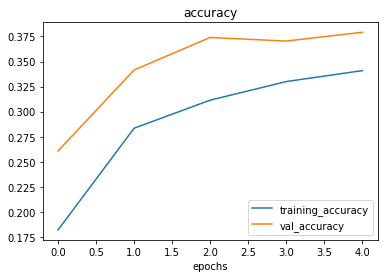

In [95]:
plot_loss_curves(history_10)

## 7. Repeat until satisfied

### Making predictions with our trained model

In [96]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [115]:
# Download some custom images
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


In [116]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

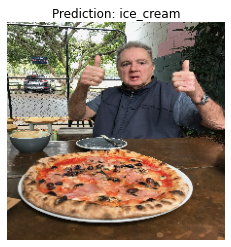

In [117]:
pred_and_plot(model=model_10, 
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

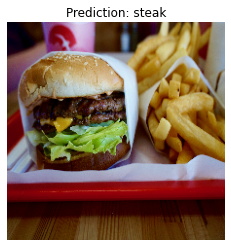

In [118]:
pred_and_plot(model=model_10, 
              filename="03-hamburger.jpeg",
              class_names=class_names)

### Saving and loading the model

In [119]:
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [120]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8003 - accuracy: 0.3792


[1.8002984523773193, 0.3792000114917755]